## Observations and Insights

As the user studies the data below, please note the following observations:
First, there were a higher number of drug treatments of Capomulin and Ramicane, as can be seen in the bar plots. Perhpas the scientists were more eager to see these results, but there were more treatments given.
Second, these two drugs were isolated alongside of Infubinol and Ceftamin as the most promising regimens to watch for. Capomulin and Ramicane, however, had much less variability in their results as can be seen from the statistical analysis. When compared with these other two drugs, the final tumor volumes are much lower and therefore show Capomulin and Ramicane to be far superior, according to these results.
Third and finally, these results are verified by the line graph showing time versus the tumor volume (mm3) for a single mouse treated with Capomulin. Although ideally this would be a truly random sample, this value was chosen at random.

Further testing would need to be done, but these results give evidence that the Capomulin drug regimen is a solid candidate for further treatment testing on mice and perhaps eventually to humans.

## Dependencies and starter code

In [247]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [249]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [250]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [251]:
# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, 
                                   how="left", on=["Mouse ID", 
                                                   "Mouse ID"])
complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [252]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

In [253]:
# Get the summary values for the tumor volume to input into a data frame
# Mean Value
mean_tv = complete_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mean_tv

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [254]:
# Median value
median_tv = complete_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
median_tv

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [255]:
# Variance value
var_tv = complete_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
var_tv

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [256]:
# Standard Deviation value
std_tv = complete_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
std_tv

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [257]:
# SEM Value
# Generate a new 30 vehicle sample and calculate the SEM of the sample
# Standard Deviation value
sem_tv = complete_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
sem_tv

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [258]:
# Combine values into a data frame
summary_stats = pd.DataFrame({"Mean": mean_tv,
                             "Median": median_tv,
                             "Variance": var_tv,
                             "Standard Deviation": std_tv,
                             "Standard Error": sem_tv})
summary_stats


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

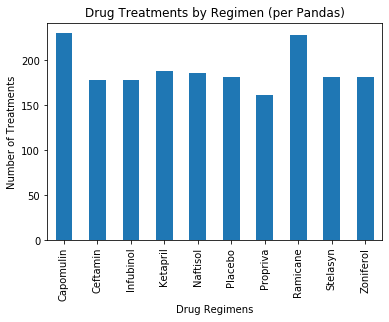

<Figure size 432x288 with 0 Axes>

In [259]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Create a group based on drug regimen values
drug_regimens = complete_df.groupby('Drug Regimen')
# Count how many times each maker appears in our group
count_reg = drug_regimens['Drug Regimen'].count()
# Create a bar chart based off of these values
dr_barchart = count_reg.plot(kind='bar', title="Drug Treatments by Regimen (per Pandas)")
dr_barchart.set_xlabel("Drug Regimens")
dr_barchart.set_ylabel("Number of Treatments")

plt.show()
plt.tight_layout()


Text(0, 0.5, 'Number of Treatments')

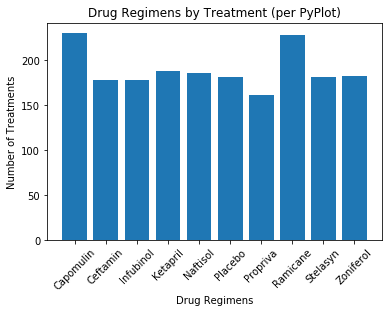

In [260]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regs = complete_df['Drug Regimen'].unique()
# Count how many times each maker appears in our group
# count_reg = drug_regimens_df['Drug Regimen'].count()
count_reg = drug_regimens['Drug Regimen'].count()
x_axis = np.sort(drug_regs)
# type(drug_regs)
y_axis = count_reg
plt.bar(x_axis, y_axis, align="center")
plt.title("Drug Regimens by Treatment (per PyPlot)")
plt.xticks(rotation=45)
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Treatments")

## Pie plots

In [261]:
# Generate pie plots showing the distribution of female versus male mice

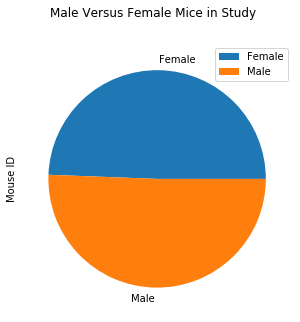

In [262]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Split up data into groups based on sex
gender_groups = complete_df.groupby('Sex')
# Find out how many tests were completed on each of the sexes
gender_tests = gender_groups['Mouse ID'].count()
genders_plot = gender_tests.plot(kind="pie", 
                                 subplots=True, 
                                 figsize=(5,5),
                                title="Male Versus Female Mice in Study")
plt.legend()


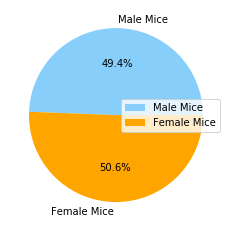

In [263]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male Mice", "Female Mice"]
colors = ['lightskyblue', 'orange']
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_tests, labels=labels, colors=colors,
        autopct="%1.1f%%")
plt.legend(loc="right")

## Quartiles, outliers and boxplots

In [264]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens.

In [265]:
# One way to retrieve the values for the final tumor volume would be to retrieve the max value of all the columns, 
# in order to isolate the highest record for each mouse's final recorded timepoint and tumor volume.
# This assumes that the at the maximum timepoint for each mouse, the corresponding tumor volume is the final tumor volume
max_df = complete_df.groupby(["Mouse ID"]).max()
max_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,45.000000,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [266]:
# From here, capture the values for the specified most promising drugs
# The first set of values is a dataframe composed only of the max values of each mouse treated with the Capomulin drug regimen
max_Cap_df = max_df.loc[(max_df["Drug Regimen"] == "Capomulin"),:]
max_Cap_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,Capomulin,Female,9,22,45,45.651331,2
b742,Capomulin,Male,7,21,45,45.000000,0
f966,Capomulin,Male,16,17,20,45.000000,0
g288,Capomulin,Male,3,19,45,46.304003,1
g316,Capomulin,Female,22,22,45,46.809225,2


In [267]:
# The new dataframe provides the information to create the quartiles and give parameters for outliers
quartiles = max_Cap_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the final tumor volume is: {lowerq}")
print(f"The upper quartile of the final tumor volume is: {upperq}")
print(f"The interquartile range of the final tumor volume is: {iqr}")
print(f"The the median final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the final tumor volume is: 45.0
The upper quartile of the final tumor volume is: 46.74900552
The interquartile range of the final tumor volume is: 1.7490055199999972
The the median final tumor volume is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.


In [268]:
# From here, capture the data frames for other three most promising drugs
max_Ram_df = max_df.loc[(max_df["Drug Regimen"] == "Ramicane"),:]
max_Inf_df = max_df.loc[(max_df["Drug Regimen"] == "Infubinol"),:]
max_Cef_df = max_df.loc[(max_df["Drug Regimen"] == "Ceftamin"),:]

In [269]:
# Now the statistics measures are outlined for each of the other three promising drug regimen treatments
quartiles = max_Ram_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the final tumor volume is: {lowerq}")
print(f"The upper quartile of the final tumor volume is: {upperq}")
print(f"The interquartile range of the final tumor volume is: {iqr}")
print(f"The the median final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the final tumor volume is: 45.0
The upper quartile of the final tumor volume is: 46.34383237
The interquartile range of the final tumor volume is: 1.3438323700000012
The the median final tumor volume is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.


In [270]:
# Now the statistics measures are outlined for each of the other three promising drug regimen treatments
quartiles = max_Inf_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the final tumor volume is: {lowerq}")
print(f"The upper quartile of the final tumor volume is: {upperq}")
print(f"The interquartile range of the final tumor volume is: {iqr}")
print(f"The the median final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the final tumor volume is: 54.04860769
The upper quartile of the final tumor volume is: 65.52574285
The interquartile range of the final tumor volume is: 11.477135160000003
The the median final tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [271]:
# Now the statistics measures are outlined for each of the other three promising drug regimen treatments
quartiles = max_Cef_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the final tumor volume is: {lowerq}")
print(f"The upper quartile of the final tumor volume is: {upperq}")
print(f"The interquartile range of the final tumor volume is: {iqr}")
print(f"The the median final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the final tumor volume is: 48.72207785
The upper quartile of the final tumor volume is: 64.29983003
The interquartile range of the final tumor volume is: 15.577752179999997
The the median final tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [272]:
# From these dataframes, the final tumor volume values are captured into separate lists
tvs_Ca = max_Cap_df["Tumor Volume (mm3)"].values.tolist()
tvs_Ram = max_Ram_df["Tumor Volume (mm3)"].values.tolist()
tvs_Inf = max_Inf_df["Tumor Volume (mm3)"].values.tolist()
tvs_Cef = max_Cef_df["Tumor Volume (mm3)"].values.tolist()
# In order to combine all these into a box plots, these lists are combined into one new list
data_to_plot = [tvs_Ca, tvs_Ram, tvs_Inf, tvs_Cef]

<Figure size 1440x432 with 0 Axes>

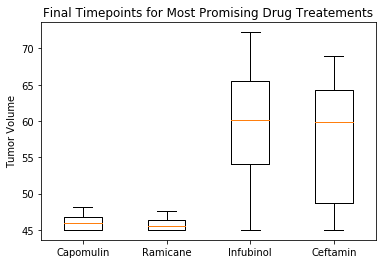

<Figure size 432x288 with 0 Axes>

In [273]:
# This plot worked!!
# Example outlier plot of reaction times

fig1 = plt.figure(1, figsize=(20, 6))
fig1, ax1 = plt.subplots()
ax1.set_title('Final Timepoints for Most Promising Drug Treatements')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(data_to_plot)
plt.show()
plt.savefig("../box_whisker.png")

## Line and scatter plots

Text(0.5, 1.0, 'Tumor Volume of Mouse ID s185')

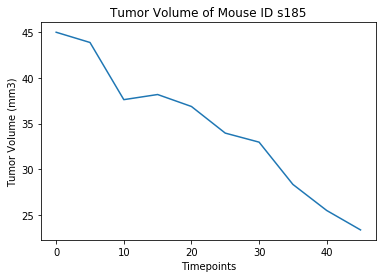

In [274]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# The mouse's value was selected from the list of mice treated with this drug
# (this value was not chosen for any particular reason, but there was no random system in place to choose it)
# Retrieve the data for the one mouse
drug_reg_single_mouse = complete_df.loc[(complete_df["Drug Regimen"] == "Capomulin")&(complete_df["Mouse ID"] == "s185")]
plt.plot(drug_reg_single_mouse["Timepoint"],drug_reg_single_mouse["Tumor Volume (mm3)"])
# cap_mouse = complete_df.loc[(complete_df["Drug Regimen"] == "Capomulin")
# cap_mouse.head()
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")  
plt.title("Tumor Volume of Mouse ID s185")
                 

In [275]:
# In order to plot a scatter plot using the values from the Drug Regimen Capomulin
# need to create a data frame with all of those treatments (unlike the one above)
# (which shows only the max volumes)
drug_reg_Ca = complete_df.loc[(complete_df["Drug Regimen"] == "Capomulin")]
mouseID = drug_reg_Ca.groupby(['Mouse ID'])
drug_reg_Ca.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0.5, 1.0, 'Drug Regimen: Capomulin')

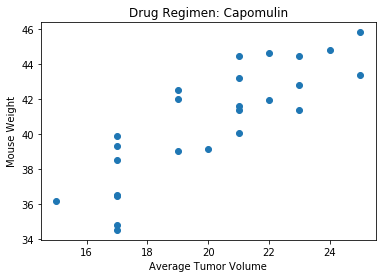

In [276]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = mouseID["Weight (g)"].mean()
y_values = mouseID["Tumor Volume (mm3)"].mean()
plt.scatter(x_values,y_values)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.title("Drug Regimen: Capomulin")

Text(0.5, 1.0, 'Drug Regimen: Capomulin')

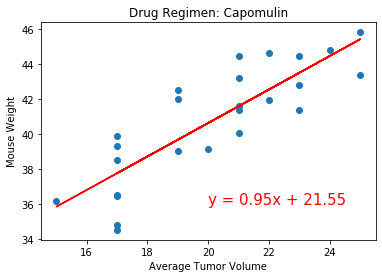

In [277]:
# Calculate the correlation coefficient and 
# linear regression model for mouse weight and average 
# tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
x_values = mouseID["Weight (g)"].mean()
y_values = mouseID["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 36),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.title("Drug Regimen: Capomulin")